In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import  Counter

In [35]:
from sklearn.datasets import make_classification

#create imbalanced datasets
X, y = make_classification(n_samples=1000, n_features=2,
                           n_clusters_per_class=1,n_redundant=0,weights=[0.99], random_state=10)

In [36]:
Counter(y)

Counter({np.int64(0): 985, np.int64(1): 15})

<Axes: xlabel='0', ylabel='1'>

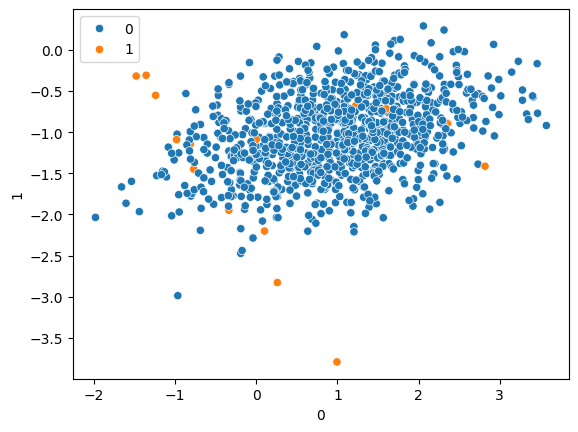

In [37]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [38]:
# pd.DataFrame(X)

#split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [39]:
#hyperparameter tuning
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
penalty = ['l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1,0.01]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
class_weight = [{0:w, 1:y} for w in [1,10,50,100] for y in [1,10,50,100]] 


In [40]:
params = dict(penalty=penalty,C= c_values, solver=solver, class_weight=class_weight)

In [41]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import StratifiedKFold

cv =StratifiedKFold()
grid = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=cv, n_jobs=-1)


In [42]:
grid.fit(X_train, y_train)

d:\Work_Directory\Machie Learning\.mlvenv\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
3200 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Work_Directory\Machie Learning\.mlvenv\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Work_Directory\Machie Learning\.mlvenv\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "d:\Work_Directory\Machie Learning\.mlvenv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1193

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [43]:
grid.best_params_

{'C': 100, 'class_weight': {0: 100, 1: 50}, 'penalty': 'l2', 'solver': 'sag'}

In [44]:
grid.best_score_

np.float64(0.9906666666666666)

In [45]:
y_pred = grid.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

score = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print('score', score)
print('cm',cm)
print(classification_report(y_test, y_pred))

score 0.976
cm [[244   0]
 [  6   0]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       244
           1       0.00      0.00      0.00         6

    accuracy                           0.98       250
   macro avg       0.49      0.50      0.49       250
weighted avg       0.95      0.98      0.96       250



d:\Work_Directory\Machie Learning\.mlvenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Work_Directory\Machie Learning\.mlvenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Work_Directory\Machie Learning\.mlvenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

In [48]:
model.predict(X_test)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.